In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import random as ran
import requests
import time

from citipy import citipy
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_id=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #cities.append(city)
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

        # Print the city count to confirm sufficient count
len(cities)
#cities


610

In [3]:
#start_time = time.time()

# Creating a dataframe
citypd = pd.DataFrame({
    "city":[x for x in cities]
})
citypd.head()


,city
0,lithakia
1,tuktoyaktuk
2,laguna
3,bonavista
4,dubrajpur


In [5]:
# Working on the API's...
url ="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
units = "imperial"
city_num = 0
citypd['country'] = ""
citypd['date'] = ""
citypd['latitude'] = ""
citypd['longitude'] = ""
citypd['Maxtemperature'] = ""
citypd['humidity'] = ""
citypd['cloudiness'] = ""
citypd['wind_speed'] = ""

for index, row in citypd.iterrows():
    city_num = city_num + 1 
    print(f"{city_num}:{city}")
    query_url = url +"&api_key"+ api_key + "&units" +units + "&q=" + row['city']
    print(query_url)
    weather_response = requests.get(query_url).json()
        
    try:
               
        row['latitude'] = weather_response["coord"]["lat"]
        row['longitude']= weather_response["coord"]["lon"]
        row['Maxtemperature']= weather_response["main"]["temp_max"]
        row['humidity'] = weather_response["main"]["humidity"]
        row['cloudiness'] = weather_response["clouds"]["all"]
        row['wind_speed'] = weather_response["wind"]["speed"]
        row['country'] = weather_response["sys"]["country"]
        row['date'] = weather_response["dt"]
        
    except:
        print("Not Found")
        continue
        
columns = ["cloudiness", "humidity", "latitude", "Maxtemperature", "wind_speed"]
for column in columns:
    citypd[column] = pd.to_numeric(citypd[column])

citypd.dropna(axis=0)

#Saving the Dataframe into csv file.
citypd.to_csv("C:/Users/Deepti/Washu BootCamp - HW/Python API Assignment/Python-API-Assignment---What-s-the-Weather-Like/Resources/WeatherData.csv", encoding="utf-8")
citypd.head()

1:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=lithakia
2:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=tuktoyaktuk
3:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=laguna
4:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=bonavista
5:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=dubrajpur
6:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&

47:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=tasiilaq
48:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=lompoc
49:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=husavik
50:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=georgetown
51:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=castro
52:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&

95:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=sungaipenuh
96:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=rikitea
97:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=may pen
98:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=taoudenni
99:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=butaritari
100:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44e

142:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=moose jaw
143:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=alexandria
144:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=chegdomyn
145:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=caraz
146:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=kamenka
147:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44

188:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=muroto
189:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=kavieng
190:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=puerto del rosario
191:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=angoche
192:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=marcona
Not Found
193:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf

235:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=salavat
236:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=ca mau
237:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=cedar city
238:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=bhimunipatnam
239:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=bengkulu
Not Found
240:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf1

281:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=inirida
282:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=macia
283:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=mizdah
284:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=rafaela
285:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=general roca
286:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe

328:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=hihifo
Not Found
329:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=botwood
330:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=touros
331:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=taperoa
332:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=svetlaya
333:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc

374:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=bayshore gardens
375:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=port hawkesbury
376:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=kruisfontein
377:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=evensk
378:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=shirokiy
379:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991c

420:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=ridgecrest
421:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=sitka
422:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=nguiu
Not Found
423:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=chernyshevskiy
424:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=mahebourg
425:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16

466:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=coquimbo
467:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=gladstone
468:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=bannur
469:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=urumqi
Not Found
470:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=trincomalee
471:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1

512:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=niamey
513:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=charlottetown
514:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=port blair
515:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=fairbanks
516:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=barentu
517:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fb

558:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=monte alegre
559:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=pingdu
560:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=ise
561:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=tabiauea
Not Found
562:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=minot
563:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc

605:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=jalu
606:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=jinsha
607:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=tabou
608:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=madanapalle
609:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2b26b&api_key925991ccf16be1ce7fbc5f44ebe2b26b&unitsimperial&q=itupiranga
610:cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925991ccf16be1ce7fbc5f44ebe2

,city,country,date,latitude,longitude,Maxtemperature,humidity,cloudiness,wind_speed
0,lithakia,GR,1533657483,37.72,20.83,85.43,75.0,0.0,9.73
1,tuktoyaktuk,CA,1533654000,69.44,-133.03,44.60,87.0,75.0,13.87
2,laguna,MX,1533653160,27.52,-110.01,82.40,65.0,20.0,3.36
3,bonavista,CA,1533657484,48.65,-53.11,64.55,85.0,80.0,9.62
4,dubrajpur,IN,1533657451,23.79,87.38,80.21,88.0,92.0,12.19


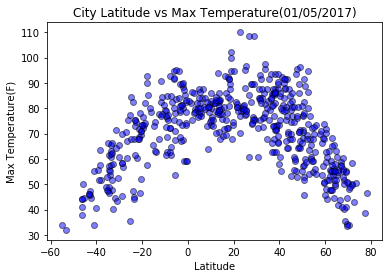

In [6]:
#Scatter Plot # 1: Temperature (F) vs. Latitude

x= citypd["latitude"]
y= citypd["Maxtemperature"]
plt.scatter(x, y,facecolors ="Blue", edgecolors="black",alpha = 0.5)
plt.title("City Latitude vs Max Temperature(01/05/2017)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.savefig("Temp_vs_Latitute.png")
plt.show()


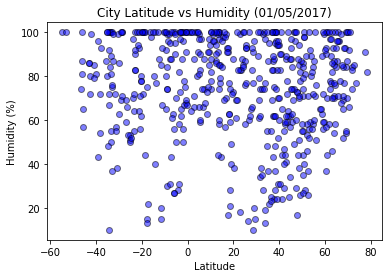

In [7]:
#Scatter Plot # 2:Humidity (%) vs. Latitude

x= citypd["latitude"]
y= citypd["humidity"]
plt.scatter(x, y,facecolors ="Blue", edgecolors="black",alpha = 0.5)
plt.title("City Latitude vs Humidity (01/05/2017)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Humidity_vs_latitude.png")
plt.show()

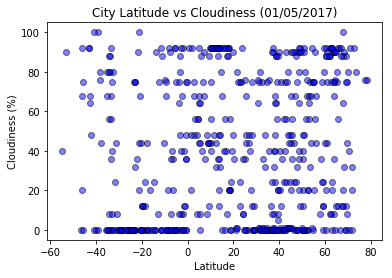

In [8]:
#Scatter Plot # 3:Cloudiness (%) vs. Latitude

x= citypd["latitude"]
y= citypd["cloudiness"]
plt.scatter(x, y,facecolors ="Blue", edgecolors="black",alpha = 0.5)
plt.title("City Latitude vs Cloudiness (01/05/2017)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Cloudiness_vs_Latitude.png")
plt.show()

In [ ]:
#Scatter Plot # 4: Wind Speed (mph) vs. Latitude

x= citypd["latitude"]
y= citypd["wind_speed"]
plt.scatter(x, y,facecolors ="Blue", edgecolors="black",alpha = 0.5)
plt.title("City Latitude vs Wind Speed (01/05/2017)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("windspeed_vs_latitude.png")
plt.show()

In [ ]:
#### Observations:
#1. It is observed that the city closest to Latitude is coldest...
#The further the cities from the equator/Latitude it would be warmer.
#2. The Humidity level is also based on the cities placed near the latitude or equator ...
#The closest cities has less humidity whereas the far cities have more of humidity.
#3.WindSpeed is more cluttered towards the latitude ...hereby observinf higher windspeed.
# The windspeed is less scattered far away from the latitude.

#### Observations:
#1. It is observed that the city closest to Latitude is coldest...
#The further the cities from the equator/Latitude it would be warmer.
#2. The Humidity level is also based on the cities placed near the latitude or equator ...
#The closest cities has less humidity whereas the far cities have more of humidity.
#3.WindSpeed is more cluttered towards the latitude ...hereby observinf higher windspeed.
# The windspeed is less scattered far away from the latitude.